# Data Understanding

**Import Library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter

**Load Data**

In [2]:
df = pd.read_csv('Anime.csv')
df

,ID,Title,Synonyms,Japanese,English,Synopsis,Type,Episodes,Status,Start_Aired,...,Themes,Demographics,Duration_Minutes,Rating,Score,Scored_Users,Ranked,Popularity,Members,Favorites
0,16498,Shingeki no Kyojin,"AoT, SnK",進撃の巨人,Attack on Titan,"Centuries ago, mankind was slaughtered to near...",TV,25.0,Finished Airing,"Apr 7, 2013",...,"Gore, Military, Survival",Shounen,24.0,R - 17+ (violence & profanity),8.531,519803.0,1002.0,1,3524109,155695
1,1535,Death Note,DN,デスノート,Death Note,"Brutal murders, petty thefts, and senseless vi...",TV,37.0,Finished Airing,"Oct 4, 2006",...,Psychological,Shounen,23.0,R - 17+ (violence & profanity),8.621,485487.0,732.0,2,3504535,159701
2,5114,Fullmetal Alchemist: Brotherhood,"Hagane no Renkinjutsushi Fullmetal Alchemist, ...",鋼の錬金術師 FULLMETAL ALCHEMIST,Fullmetal Alchemist Brotherhood,After a horrific alchemy experiment goes wrong...,TV,64.0,Finished Airing,"Apr 5, 2009",...,Military,Shounen,24.0,R - 17+ (violence & profanity),9.131,900398.0,12.0,3,2978455,207772
3,30276,One Punch Man,"One Punch-Man, One-Punch Man, OPM",ワンパンマン,One Punch Man,The seemingly unimpressive Saitama has a rathe...,TV,12.0,Finished Airing,"Oct 5, 2015",...,"Parody, Super Power",Seinen,24.0,R - 17+ (violence & profanity),8.511,19066.0,1112.0,4,2879907,59651
4,11757,Sword Art Online,"S.A.O, SAO",ソードアート・オンライン,Sword Art Online,Ever since the release of the innovative Nerve...,TV,25.0,Finished Airing,"Jul 8, 2012",...,"Love Polygon, Video Game",Unknown,23.0,PG-13 - Teens 13 or older,7.201,990254.0,29562.0,5,2813565,64997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21455,45064,Xiao Gongzhu Ai Wei La Yu Shenmi Wangguo,Unknown,小公主艾薇拉与神秘王国,Princess and the Kingdom,Unknown,Movie,1.0,Finished Airing,"May 12, 2018",...,Unknown,Kids,78.0,G - All Ages,NaN,NaN,160892.0,21487,7,0
21456,45065,Xiao Gongzhu Ai Wei La Yu Shenmi Wangguo 2,Unknown,小公主艾薇拉与神秘王国2,Avera and the Mystical Kingdom 2,Unknown,Movie,1.0,Finished Airing,"Aug 22, 2020",...,Unknown,Kids,80.0,G - All Ages,NaN,NaN,160902.0,21488,6,0
21457,45059,Yongzhe Chuang Mo Cheng,Unknown,勇者闯魔城,Brave City,Unknown,Movie,1.0,Finished Airing,"Mar 16, 2018",...,Unknown,Unknown,80.0,G - All Ages,NaN,NaN,164032.0,21489,6,0
21458,45063,Yu Shen Chuan: Wangzhe Shaonian,Unknown,禹神传之王者少年,The Juvenile of King Yu,Unknown,Movie,1.0,Finished Airing,"Aug 15, 2018",...,Unknown,Unknown,90.0,G - All Ages,NaN,NaN,164462.0,21490,6,0


**Data Info**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21460 entries, 0 to 21459
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                21460 non-null  int64  
 1   Title             21460 non-null  object 
 2   Synonyms          21460 non-null  object 
 3   Japanese          21460 non-null  object 
 4   English           21460 non-null  object 
 5   Synopsis          21460 non-null  object 
 6   Type              21460 non-null  object 
 7   Episodes          20913 non-null  float64
 8   Status            21460 non-null  object 
 9   Start_Aired       21460 non-null  object 
 10  End_Aired         21460 non-null  object 
 11  Premiered         21460 non-null  object 
 12  Broadcast         21460 non-null  object 
 13  Producers         21460 non-null  object 
 14  Licensors         21460 non-null  object 
 15  Studios           21460 non-null  object 
 16  Source            21460 non-null  object

1. ID: ID unik anime di MyAnimeList.net
2. Title: Judul asli dari anime
3. Synonyms: Nama lain (sinonim) dari anime
4. Japanese: Judul anime dalam bahasa Jepang
5. English: Judul anime dalam bahasa Inggris
6. Synopsis: Ringkasan atau sinopsis dari anime
7. Type: Tipe anime (misalnya, TV, Movie, OVA, ONA, Special, Music)
8. Episodes: Jumlah episode dalam anime
9. Status: Status penayangan anime (belum tayang, sedang tayang, sudah selesai tayang)
10. Start_Aired: Tanggal atau tahun mulai tayang anime
11. End_Aired: Tanggal atau tahun selesai tayang anime
23. Premiered: Musim tayang perdana anime
13. Broadcast: Jadwal siaran anime
14. Producers: Daftar produser anime
15. Licensors: Daftar pemegang lisensi anime
16. Studios: Daftar studio animasi yang memproduksi anime
17. Source: Sumber materi asli anime
18. Genres: Daftar genre anime
19. Themes: Daftar tema-tema yang ada dalam anime
20. Demographics: Target demografi penonton anime
21. Duration_Minutes: Durasi total per menit untuk setiap episode anime
22. Rating: Batasan usia penonton yang direkomendasikan untuk anime
23. Score: Skor rata-rata anime yang diberikan oleh pengguna di MyAnimeList.net
24.Scored_Users: Jumlah pengguna yang memberikan skor pada anime
25. Ranked: Peringkat anime berdasarkan skor
26. Popularity: Peringkat anime berdasarkan popularitas (jumlah pengguna yang menambahkan ke daftar mereka)
27. Members: Jumlah pengguna yang telah menambahkan anime ke daftar tontonan mereka
28. Favorites: Jumlah pengguna yang menandai anime sebagai favorit mereka

**Statistik Deskriptif**

In [4]:
df.describe(include='all')

,ID,Title,Synonyms,Japanese,English,Synopsis,Type,Episodes,Status,Start_Aired,...,Themes,Demographics,Duration_Minutes,Rating,Score,Scored_Users,Ranked,Popularity,Members,Favorites
count,21460.000000,21460,21460,21460,21460,21460,21460,20913.000000,21460,21460,...,21460,21460,20861.000000,20915,14562.000000,14562.000000,19536.000000,21460.000000,2.146000e+04,21460.000000
unique,NaN,21460,11557,20473,8897,18505,7,NaN,3,8221,...,736,10,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Konglong Wang,Unknown,Unknown,Unknown,Unknown,TV,NaN,Finished Airing,Unknown,...,Unknown,Unknown,NaN,PG-13 - Teens 13 or older,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,9280,62,12378,2718,6280,NaN,20693,374,...,9648,13426,NaN,7655,NaN,NaN,NaN,NaN,NaN,NaN
mean,26458.575582,NaN,NaN,NaN,NaN,NaN,NaN,13.272892,NaN,NaN,...,NaN,NaN,23.934135,NaN,6.421724,26507.173809,97795.212019,10743.103681,3.926596e+04,462.214865
std,17100.477121,NaN,NaN,NaN,NaN,NaN,NaN,48.792326,NaN,NaN,...,NaN,NaN,24.676538,NaN,0.910469,84989.501599,56485.384273,6204.685188,1.566359e+05,4411.931536
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,...,NaN,NaN,1.000000,NaN,1.841000,101.000000,12.000000,1.000000,6.000000e+00,0.000000
25%,8454.750000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,...,NaN,NaN,5.000000,NaN,5.791000,418.000000,48879.500000,5369.750000,2.910000e+02,0.000000
50%,31004.500000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,...,NaN,NaN,22.000000,NaN,6.431000,1876.500000,97777.000000,10741.500000,1.582500e+03,2.000000
75%,40495.250000,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,NaN,NaN,...,NaN,NaN,26.000000,NaN,7.081000,11406.500000,146714.500000,16119.250000,1.158550e+04,23.000000


Output dari df.describe() memberikan statistik deskriptif penting untuk kolom-kolom numerik dalam DataFrame df. Statistik ini meliputi:

- count: Jumlah total data (non-null)
- std: Standar deviasi, mengukur penyebaran data. Harga rumah memiliki standar deviasi yang sangat tinggi, menandakan variasi harga yang besar.
- min: Nilai minimum untuk setiap kolom.
- 25%: Kuartil pertama (nilai di mana 25% data berada di bawahnya).
- 50%: Median atau kuartil kedua (nilai tengah data).
- 75%: Kuartil ketiga (nilai di mana 75% data berada di bawahnya).
- max: Nilai maksimum untuk setiap kolom.

**Missing Value**

In [5]:
df.isnull().sum()

,0
ID,0
Title,0
Synonyms,0
Japanese,0
English,0
Synopsis,0
Type,0
Episodes,547
Status,0
Start_Aired,0


Terdapat missing value pada kolom:
- Episodes	547
- Duration_Minutes	599
- Rating	545
- Score	6898
- Scored_Users	6898
- Ranked	1924


In [6]:
jumlah_duplikat = df.duplicated().sum()
jumlah_duplikat

np.int64(0)

Tidak ada jumlah data duplikat

**Matriks Korelasi**

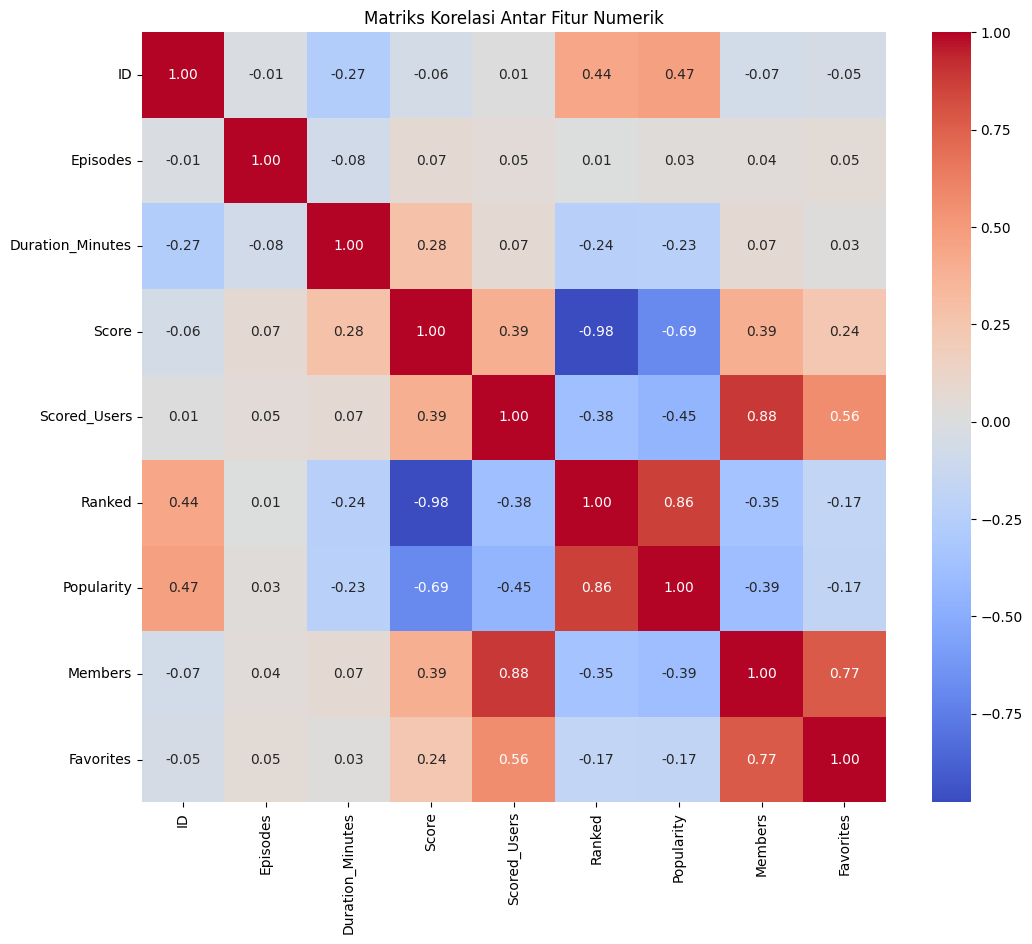

In [7]:
correlation_matrix = df.corr(numeric_only=True) # Pastikan hanya kolom numerik yang dihitung korelasinya
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Antar Fitur Numerik')
plt.show()

1. ID: Tidak berkorelasi signifikan dengan fitur lain.
2. Skor:
- Berkorelasi positif sedang dengan jumlah pemberi skor, anggota, dan favorit.
- Berkorelasi negatif sangat kuat dengan peringkat dan popularitas.
3. Jumlah Pemberi Skor:
- Berkorelasi positif sangat kuat dengan jumlah anggota dan favorit.
- Berkorelasi negatif sedang dengan peringkat dan popularitas.
4. Peringkat:
- Berkorelasi positif sangat kuat dengan popularitas.
- Berkorelasi negatif sedang dengan jumlah anggota dan favorit.
5. Popularitas:
- Berkorelasi positif kuat dengan jumlah anggota dan sedang dengan favorit.
6. Jumlah Anggota: Berkorelasi positif kuat dengan jumlah favorit.
7. Jumlah Episode dan Durasi: Korelasinya lemah dengan fitur lain.
8. Implikasi Rekomendasi:
- Fitur berkorelasi tinggi mungkin memberikan informasi redundan.
- Skor, jumlah pemberi skor, anggota, dan favorit adalah indikator popularitas dan kualitas.
- Jumlah episode dan durasi memberikan informasi yang berbeda.
9. Kesimpulan: Heatmap visualisasikan hubungan linier, penting untuk pemilihan fitur dan pemahaman data, namun tidak mencerminkan hubungan non-linier atau sebab-akibat.

**Distribusi Tipe Anime**

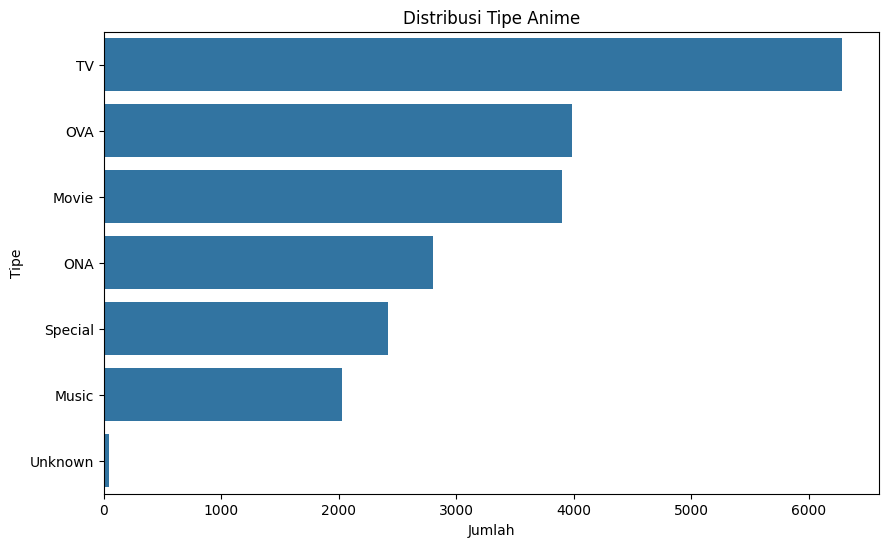

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Type', order=df['Type'].value_counts().index)
plt.title('Distribusi Tipe Anime')
plt.xlabel('Jumlah')
plt.ylabel('Tipe')
plt.show()

Distribusi tipe anime terbanyak adalah TV

**Distribusi Rating Anime**

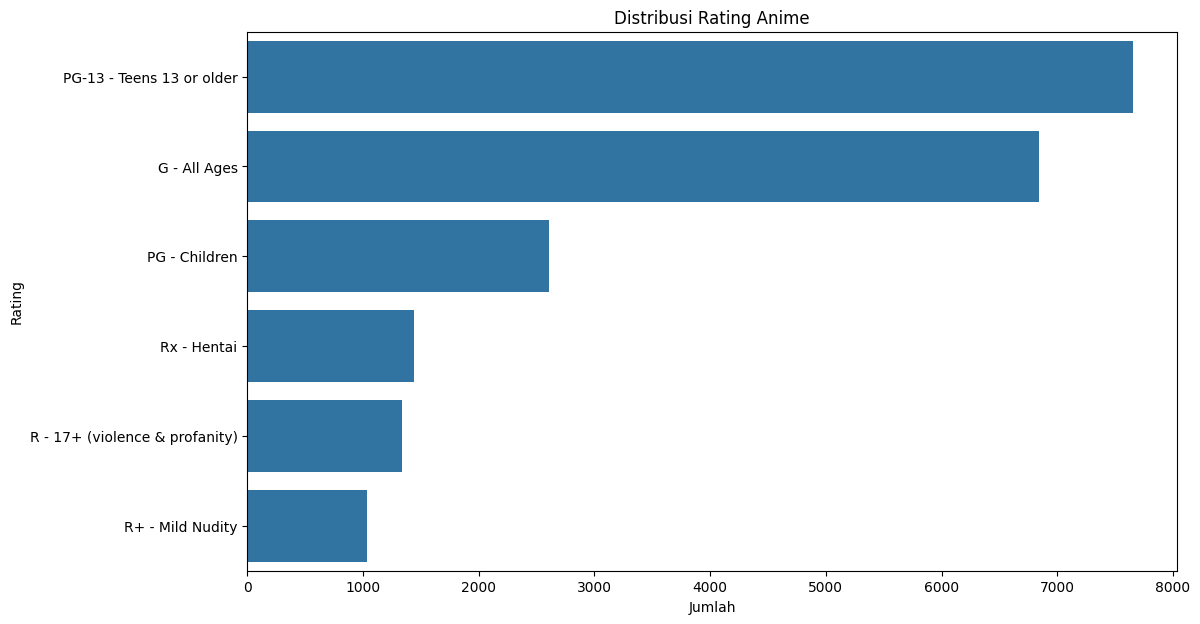

In [9]:
plt.figure(figsize=(12, 7))
sns.countplot(data=df, y='Rating', order=df['Rating'].value_counts().index)
plt.title('Distribusi Rating Anime')
plt.xlabel('Jumlah')
plt.ylabel('Rating')
plt.show()

Rating terbanyak adalah PG-13 (Teens 13 or older)

**Top 10 Genre Terpopuler**

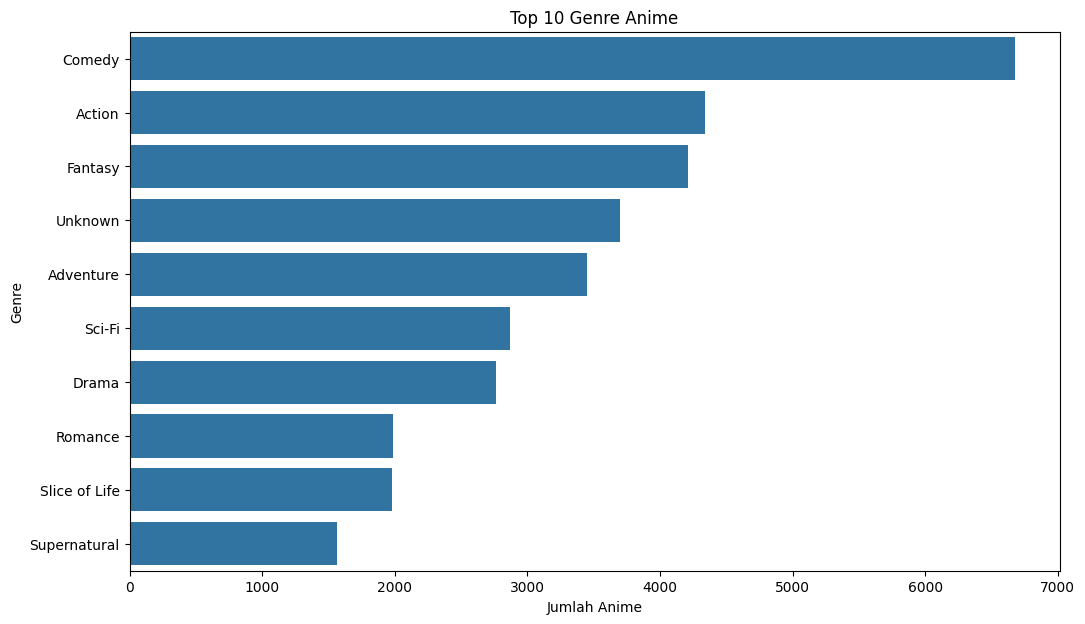

Insight: Genre terpopuler adalah Comedy.


In [10]:
genre_counts = Counter()
for genres in df['Genres'].dropna():
    genre_counts.update(genres.split(', '))

top_10_genres = genre_counts.most_common(10)
genres, counts = zip(*top_10_genres)

plt.figure(figsize=(12, 7))
sns.barplot(x=list(counts), y=list(genres))
plt.title('Top 10 Genre Anime')
plt.xlabel('Jumlah Anime')
plt.ylabel('Genre')
plt.show()
print(f"Insight: Genre terpopuler adalah {genres[0]}.")

**Distribusi Status Penayangan**

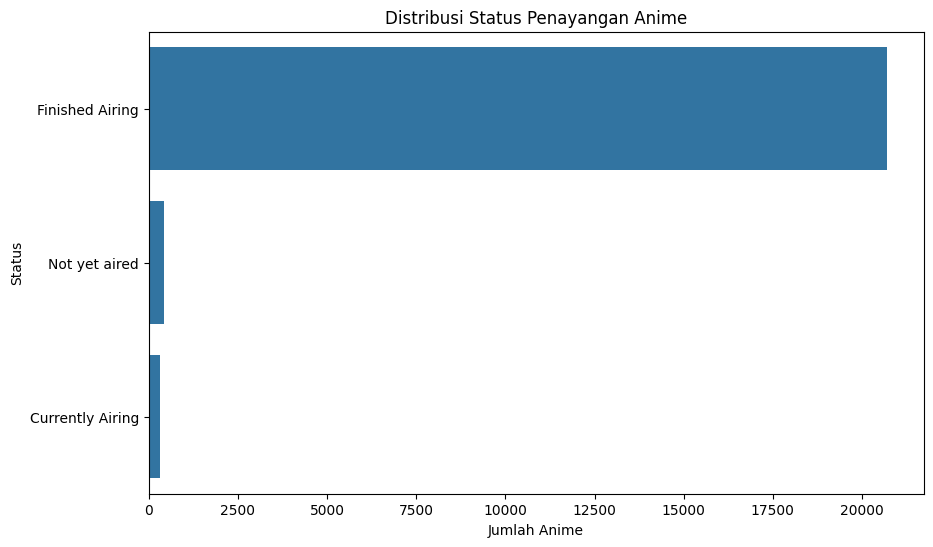

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Status', order=df['Status'].value_counts().index)
plt.title('Distribusi Status Penayangan Anime')
plt.xlabel('Jumlah Anime')
plt.ylabel('Status')
plt.show()

Status penayangan terbanyak adalah selesai tayang

**Distribusi Sumber**

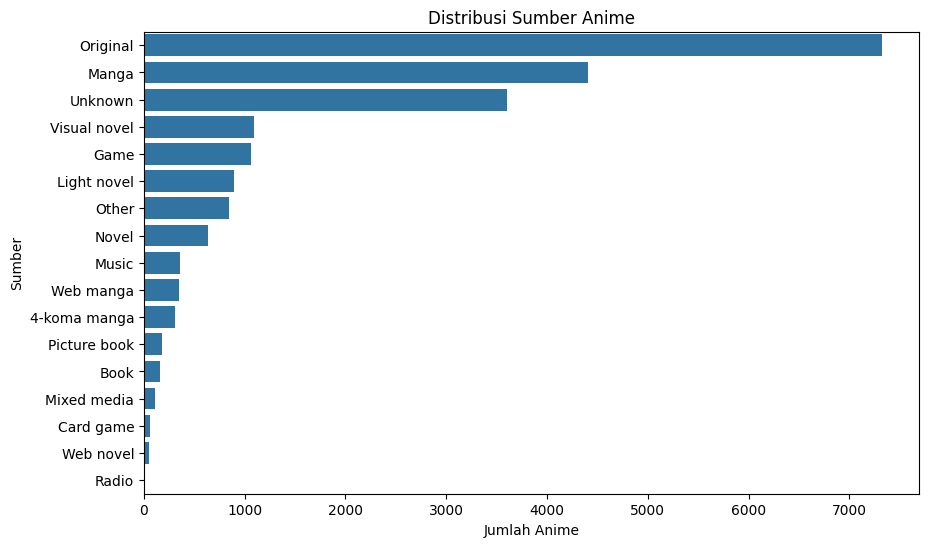

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Source', order=df['Source'].value_counts().index)
plt.title('Distribusi Sumber Anime')
plt.xlabel('Jumlah Anime')
plt.ylabel('Sumber')
plt.show()

Sumber anime terbanyak adalah original

**Top 10 Studio**

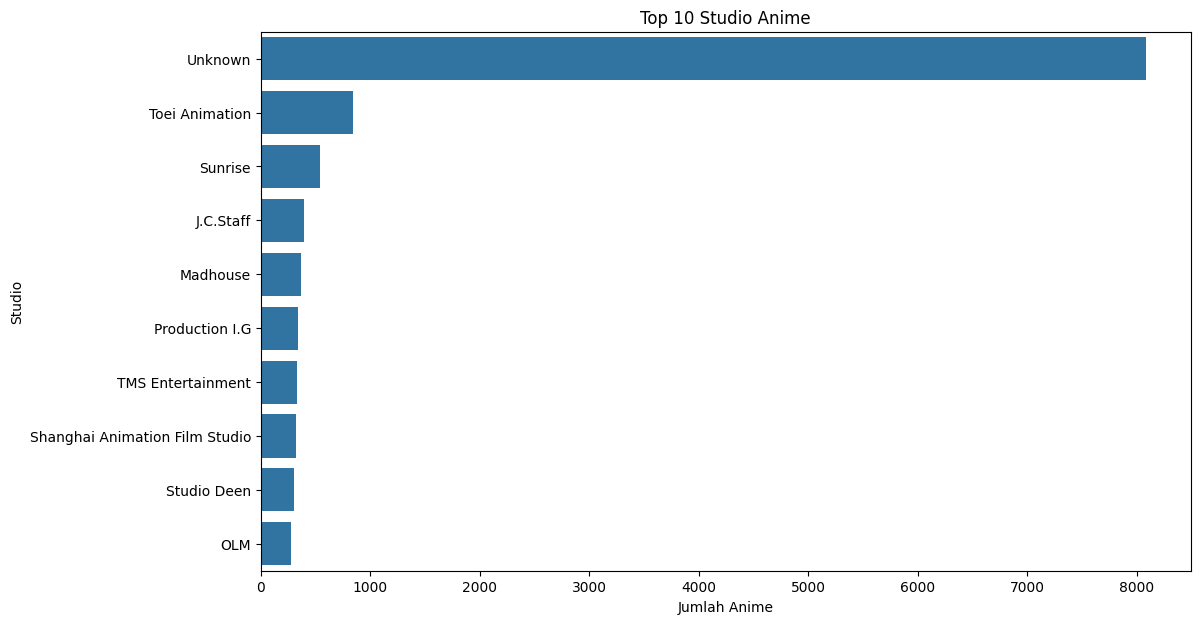

In [13]:
studios_counts = Counter()
for studios_str in df['Studios'].dropna():
    studios_counts.update(studios_str.split(', '))

top_10_studios = studios_counts.most_common(10)
studios, counts = zip(*top_10_studios)

plt.figure(figsize=(12, 7))
sns.barplot(x=list(counts), y=list(studios))
plt.title('Top 10 Studio Anime')
plt.xlabel('Jumlah Anime')
plt.ylabel('Studio')
plt.show()

Masih banyak unknown studio, tetapi studio pembuat anime terbanyak adalah Toel Animation

**Top 10 Tema Anime**

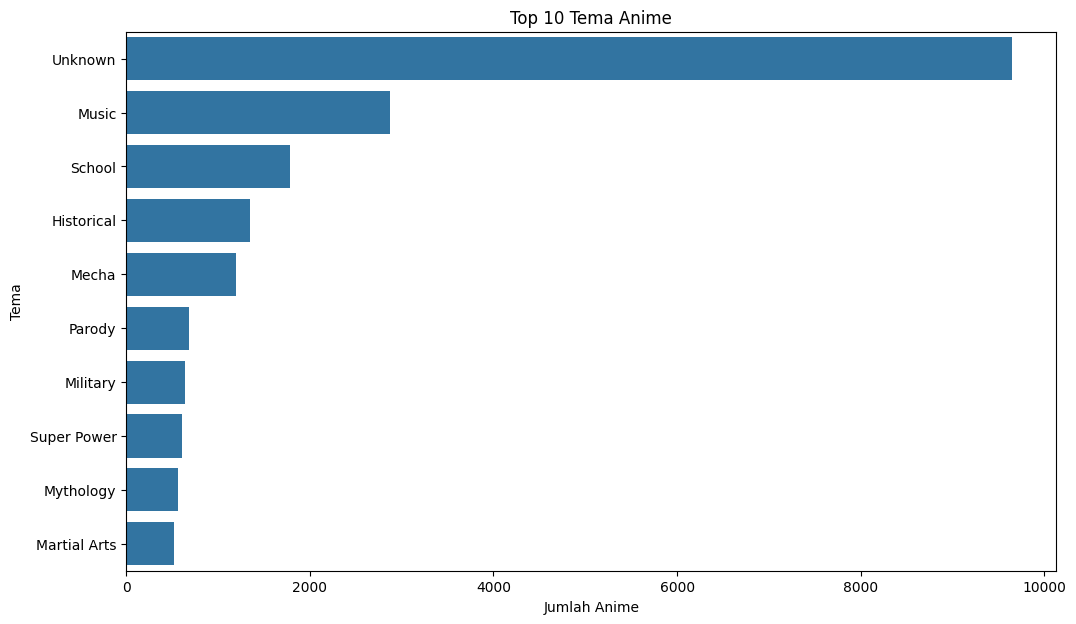

In [14]:
themes_counts = Counter()
for themes_str in df['Themes'].dropna():
    themes_counts.update(themes_str.split(', '))

top_10_themes = themes_counts.most_common(10)
themes, counts = zip(*top_10_themes)

plt.figure(figsize=(12, 7))
sns.barplot(x=list(counts), y=list(themes))
plt.title('Top 10 Tema Anime')
plt.xlabel('Jumlah Anime')
plt.ylabel('Tema')
plt.show()

Masih banyak unknown tema, tetapi tema anime terbanyak adalah music

# Data Preparation

**Menangani Missing Value**

In [15]:
# Mengisi missing values pada 'Episodes' dengan median per 'Type'
df['Episodes'] = df.groupby('Type')['Episodes'].transform(lambda x: x.fillna(x.median()))

# Mengisi missing values pada 'Duration_Minutes' dengan median keseluruhan
df['Duration_Minutes'].fillna(df['Duration_Minutes'].median(), inplace=True)

# Mengisi missing values pada 'Rating' dengan modus
df['Rating'].fillna(df['Rating'].mode()[0], inplace=True)

# Mengisi missing values pada 'Score' dan 'Scored_Users' dengan 0 (asumsi belum dinilai)
df['Score'].fillna(0, inplace=True)
df['Scored_Users'].fillna(0, inplace=True)

# Mengisi missing values pada 'Ranked' dengan nilai di luar rentang (misalnya, -1)
df['Ranked'].fillna(-1, inplace=True)

# Verifikasi jumlah missing values setelah penanganan
print(df[['Episodes', 'Duration_Minutes', 'Rating', 'Score', 'Scored_Users', 'Ranked']].isnull().sum())

Episodes            0
Duration_Minutes    0
Rating              0
Score               0
Scored_Users        0
Ranked              0
dtype: int64


<ipython-input-15-d8eb2912df11>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Duration_Minutes'].fillna(df['Duration_Minutes'].median(), inplace=True)
<ipython-input-15-d8eb2912df11>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

**Cek Missing Value setelah Cleaning**

In [16]:
df.isnull().sum()

,0
ID,0
Title,0
Synonyms,0
Japanese,0
English,0
Synopsis,0
Type,0
Episodes,0
Status,0
Start_Aired,0


Data terbebas dari missing value

**Ekstraksi Fitur Tf Idf**

In [17]:
# Feature Extraction
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['Genres'].fillna('')) # Mengatasi Nilai NaN

# Modeling and Result

**Content-Based Filtering with Cosine Similarity**

In [18]:
# Calculate Cosine Similarity
cosine_sim_content = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Recommendation Function
def get_content_based_recommendations(title, cosine_sim=cosine_sim_content, df=df, top_n=5):
    indices = pd.Series(df.index, index=df['Title']).drop_duplicates()
    try:
        idx = indices[title]
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:top_n+1]
        anime_indices = [i[0] for i in sim_scores]
        return df['Title'].iloc[anime_indices].tolist() # Return as list for easier evaluation
    except KeyError:
        print(f"Anime '{title}' tidak ditemukan.")
        return []

# --- Top-N Recommendation dan Evaluasi ---
anime_to_recommend_for = "Naruto"
top_k = 5
content_based_recommendations = get_content_based_recommendations(anime_to_recommend_for, top_n=top_k)
print(f"\nTop {top_k} Rekomendasi Content-Based untuk '{anime_to_recommend_for}':")
print(content_based_recommendations)


Top 5 Rekomendasi Content-Based untuk 'Naruto':
['Hunter x Hunter (2011)', 'Naruto: Shippuuden', 'One Piece', 'Nanatsu no Taizai', 'Bleach']


# Evaluation

In [19]:
# Fungsi Evaluasi
def precision_at_k(relevant_items, recommended_items, k=5):
    """Menghitung Precision@K."""
    if not recommended_items:
        return 0.0
    top_k = recommended_items[:k]
    relevant_in_top_k = [item for item in top_k if item in relevant_items]
    return len(relevant_in_top_k) / min(k, len(recommended_items))

def recall_at_k(relevant_items, recommended_items, k=5):
    """Menghitung Recall@K."""
    if not relevant_items:
        return 0.0
    top_k = recommended_items[:k]
    relevant_in_top_k = [item for item in top_k if item in relevant_items]
    return len(relevant_in_top_k) / len(relevant_items)

def f1_score_at_k(precision, recall):
    """Menghitung F1-score@K."""
    if precision + recall == 0:
        return 0.0
    return 2 * (precision * recall) / (precision + recall)

# mendefinisikan secara manual atau berdasarkan data interaksi pengguna
# item mana yang dianggap relevan untuk 'Naruto'.
relevant_for_naruto = ["Hunter x Hunter (2011)", "Naruto: Shippuuden", "One Piece", "Nanatsu no Taizai", "Bleach"]

# Evaluasi
precision = precision_at_k(relevant_for_naruto, content_based_recommendations, k=top_k)
recall = recall_at_k(relevant_for_naruto, content_based_recommendations, k=top_k)
f1 = f1_score_at_k(precision, recall)

print(f"\nEvaluasi Content-Based Filtering untuk '{anime_to_recommend_for}' ")
print(f"Precision@{top_k}: {precision}")
print(f"Recall@{top_k}: {recall}")
print(f"F1-score@{top_k}: {f1}")


Evaluasi Content-Based Filtering untuk 'Naruto' 
Precision@5: 1.0
Recall@5: 1.0
F1-score@5: 1.0


Semua rekomendasi (5/5) yang diberikan sistem termasuk dalam daftar anime relevan yang  didefinisikan.

Ini adalah kondisi ideal, artinya sistem rekomendasi bekerja dengan sangat baik untuk kasus ini.